<a href="https://colab.research.google.com/github/Panthisarang/Machine-Learning-Projects/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LSTM model


In [ ]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
# from keras.utils.vis_utils import plot_model
from keras import backend as K

%matplotlib inline

# Ensure matplotlib plots display inline in Jupyter Notebooks
plt.style.use('seaborn')

In [ ]:
df= pd.read_csv('/content/MSFT.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.shape

(9083, 7)

<Axes: >

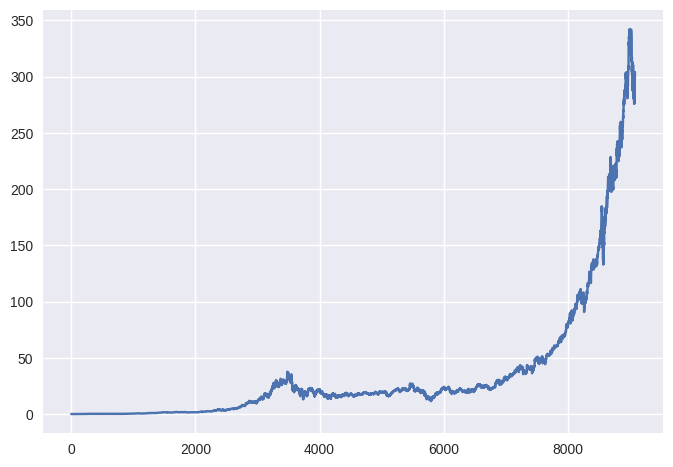

In [ ]:
df['Adj Close'].plot()

In [ ]:
# Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])

# Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [ ]:
# Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
0,0.000000,0.000027,0.000000,1.000000
1,0.000025,0.000030,0.000025,0.297096
2,0.000035,0.000032,0.000036,0.127119
3,0.000040,0.000032,0.000030,0.063588
4,0.000033,0.000025,0.000025,0.044285


In [ ]:
# Splitting into Training set and Test set
timesplit = TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform.iloc[train_index], feature_transform.iloc[test_index]
    y_train, y_test = output_var.iloc[train_index].values.ravel(), output_var.iloc[test_index].values.ravel()

In [ ]:
# Process the data for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1033/1033 [==============================] - 9s 6ms/step - loss: 78.6703
Epoch 2/100
1033/1033 [==============================] - 5s 5ms/step - loss: 234.2567
Epoch 3/100
1033/1033 [==============================] - 7s 7ms/step - loss: 152.4650
Epoch 4/100
1033/1033 [==============================] - 5s 5ms/step - loss: 92.4529
Epoch 5/100
1033/1033 [==============================] - 3s 2ms/step - loss: 51.5727
Epoch 6/100
1033/1033 [==============================] - 2s 2ms/step - loss: 24.5159
Epoch 7/100
1033/1033 [==============================] - 4s 4ms/step - loss: 9.8890
Epoch 8/100
1033/1033 [==============================] - 2s 2ms/step - loss: 4.1758
Epoch 9/100
1033/1033 [==============================] - 2s 2ms/step - loss: 2.4545
Epoch 10/100
1033/1033 [==============================] - 2s 2ms/step - loss: 1.7926
Epoch 11/100
1033/1033 [==============================] - 2s 2ms/step - loss: 1.4247
Epoch 12/100
1033/1033 [==============================] - 3s 3ms/s

In [ ]:
# LSTM Prediction
y_pred = lstm.predict(X_test)

26/26 [==============================] - 1s 10ms/step


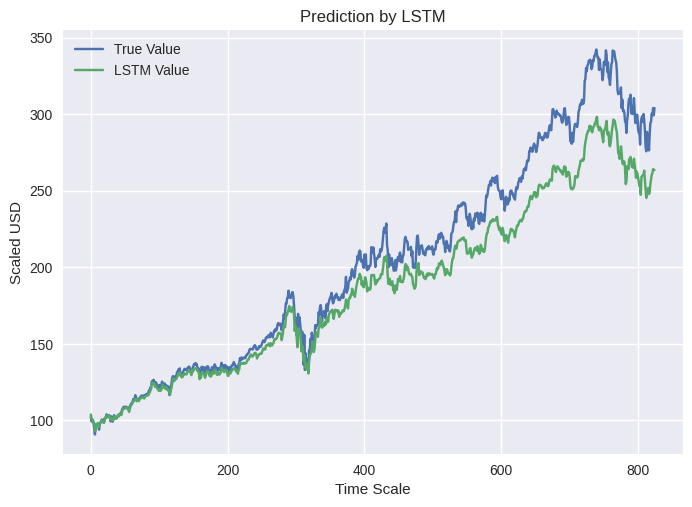

In [ ]:
# Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

#Failed model

##Data splitting and *normalization*

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2660, 3) (296, 3)


In [ ]:
print(X_train)

[[ 0.02811407  0.38066045  1.40600066]
 [ 0.40085825 -2.9071557  -0.71123722]
 [ 0.01554506  0.38864808  1.40600066]
 ...
 [ 0.00709703  0.44256309  1.40600066]
 [-0.00505979  0.40119965  1.40600066]
 [ 0.09631634  0.30806075 -0.71123722]]


In [ ]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5144548991864166
Validation Accuracy :  0.5384615384615384

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5003647683056244
Validation Accuracy :  0.4596611721611722

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

XGBClassifier overfitting


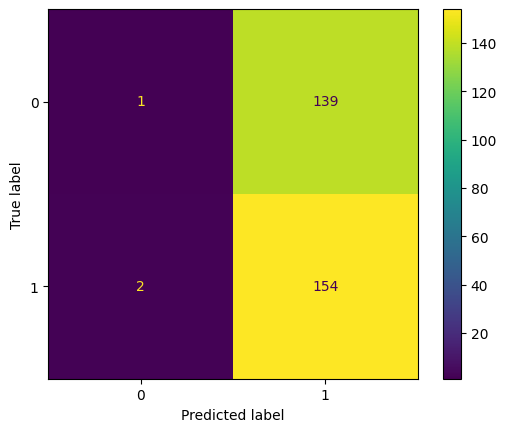

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_valid, models[0].predict(X_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##Data pre-processing and analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
df[df['Close'] == df['Adj Close']].shape

(2956, 7)

In [ ]:
df = df.drop(['Adj Close'], axis=1)

In [ ]:
df.shape

(2956, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,3.046940e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2956 non-null   object 
 1   Open    2956 non-null   float64
 2   High    2956 non-null   float64
 3   Low     2956 non-null   float64
 4   Close   2956 non-null   float64
 5   Volume  2956 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 138.7+ KB


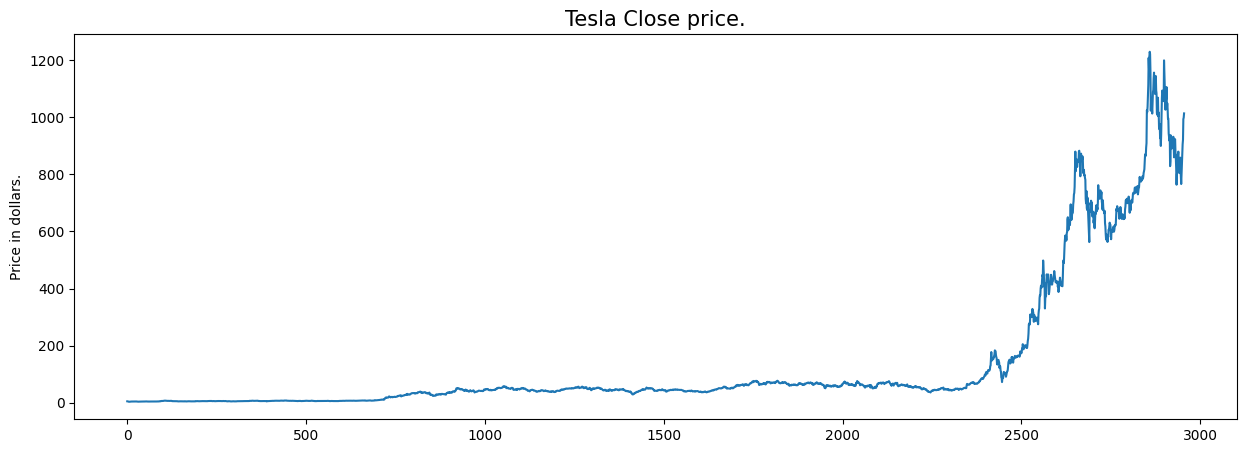

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

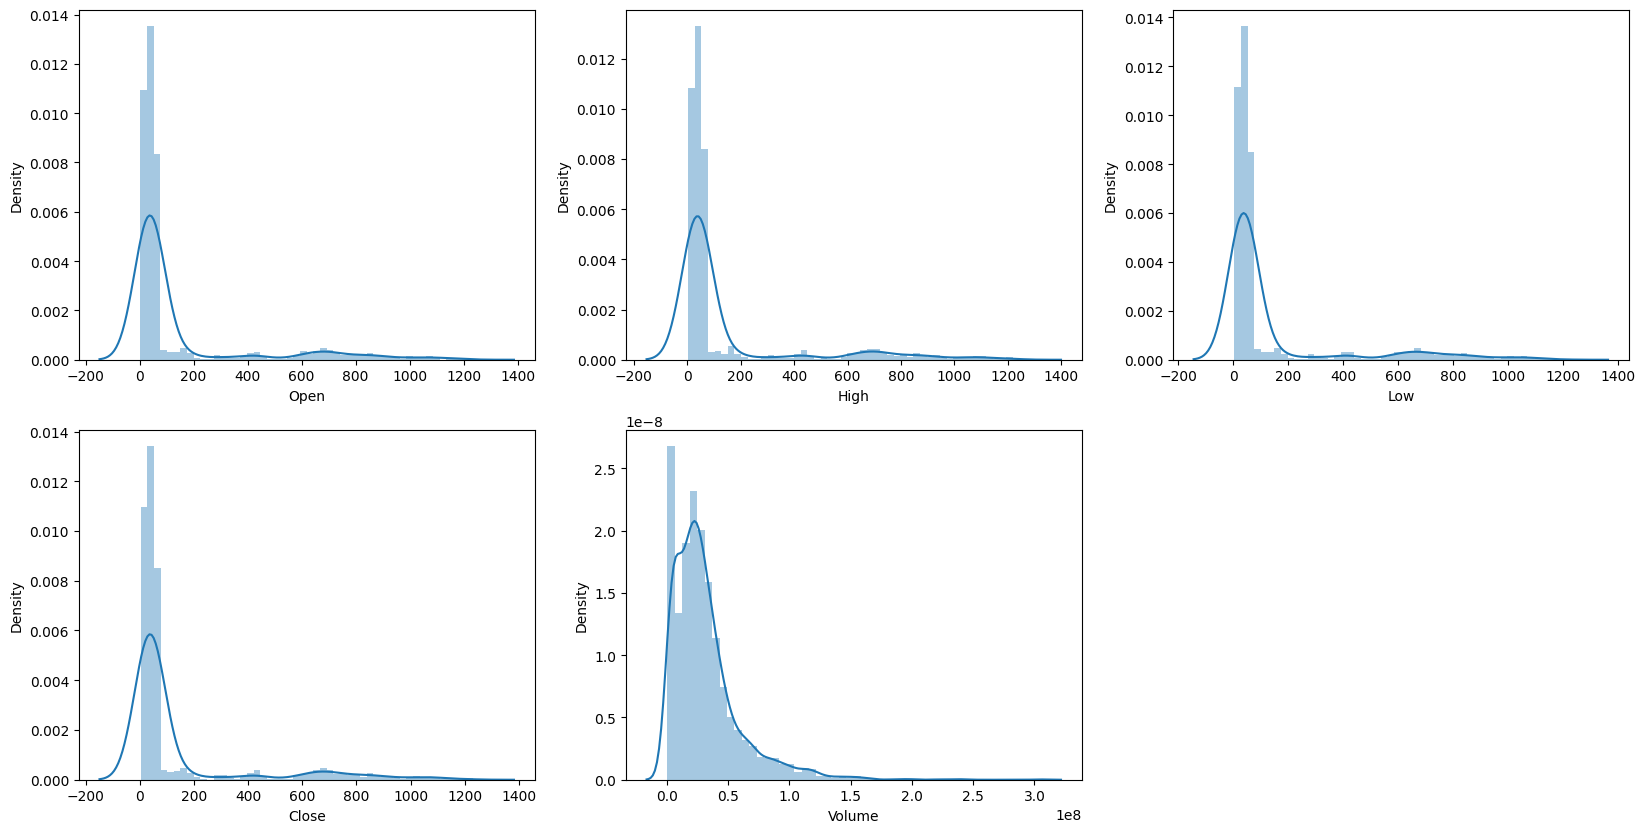

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

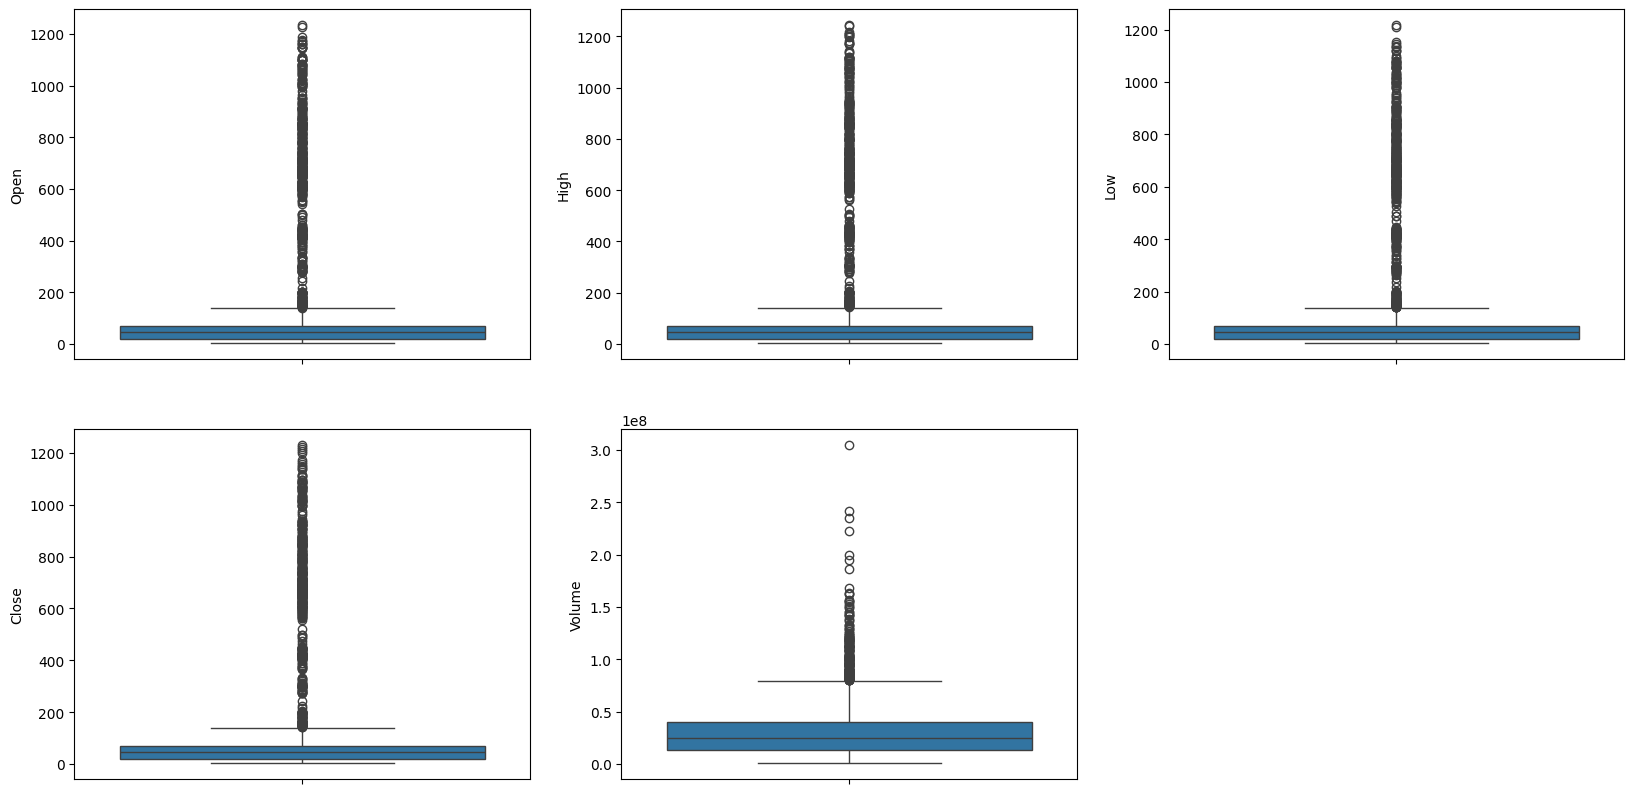

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [ ]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,29,6,2010,1
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,30,6,2010,1
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,1,7,2010,0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,2,7,2010,0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,6,7,2010,0


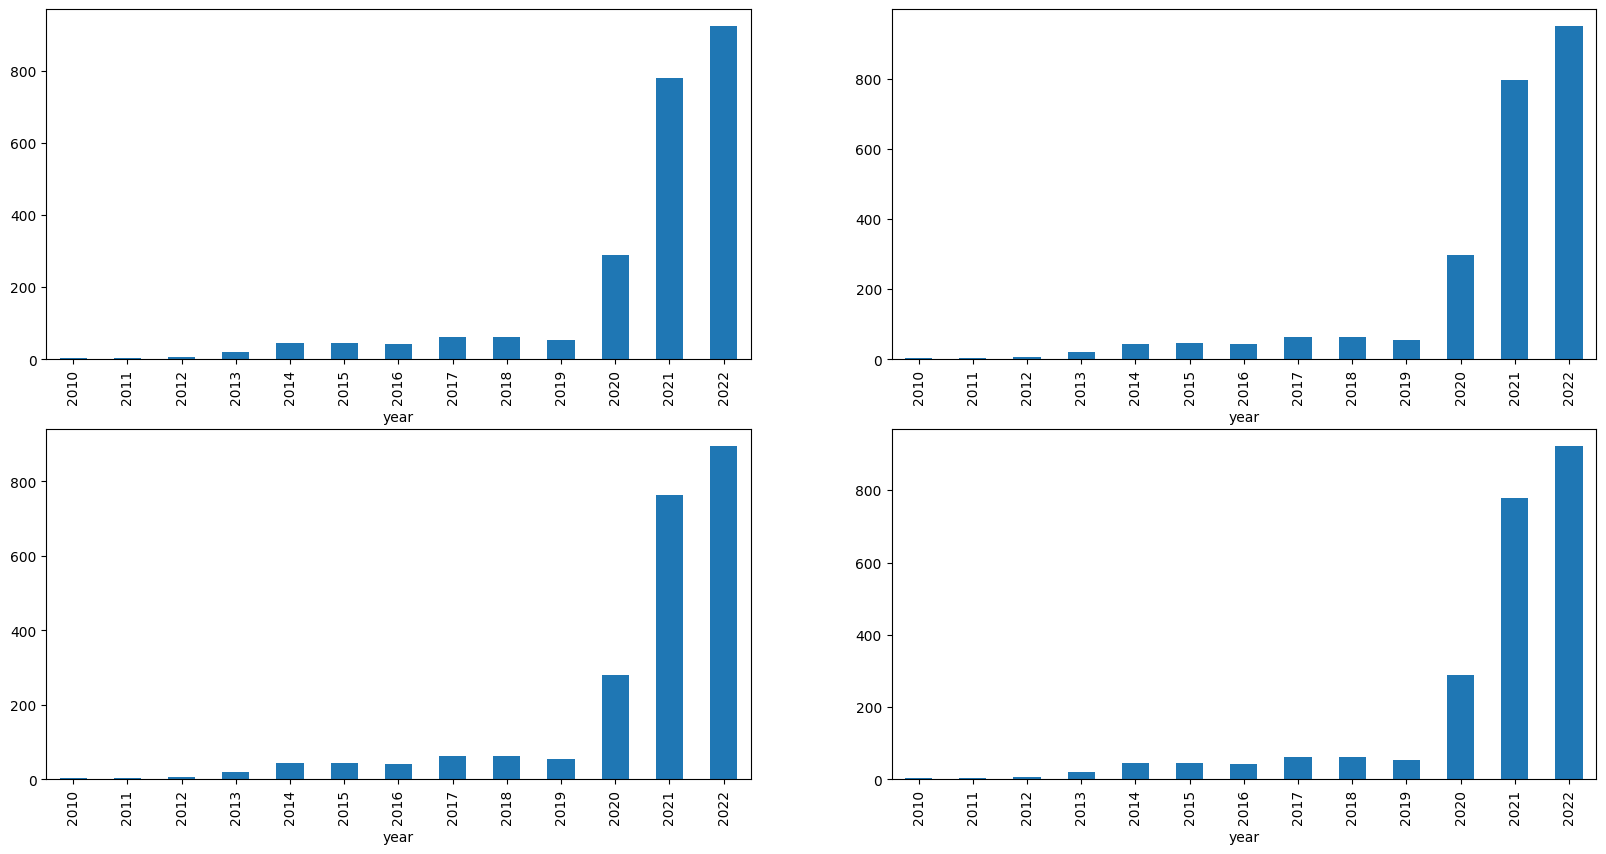

In [ ]:
df= df.drop(['Date'], axis=1)
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,136.474690,139.523037,133.361644,136.531872,3.194378e+07,15.701987,6.124300,2015.855833
1,143.073168,146.216652,139.506757,143.171146,3.007048e+07,15.736153,7.489426,2015.852971


In [ ]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,3.800,5.000,3.508,4.778,93831500,29,6,2010,1,-0.978,-1.492,0
1,5.158,6.084,4.660,4.766,85935500,30,6,2010,1,0.392,-1.424,0
2,5.000,5.184,4.054,4.392,41094000,1,7,2010,0,0.608,-1.130,0
3,4.600,4.620,3.742,3.840,25699000,2,7,2010,0,0.760,-0.878,0
4,4.000,4.000,3.166,3.222,34334500,6,7,2010,0,0.778,-0.834,0


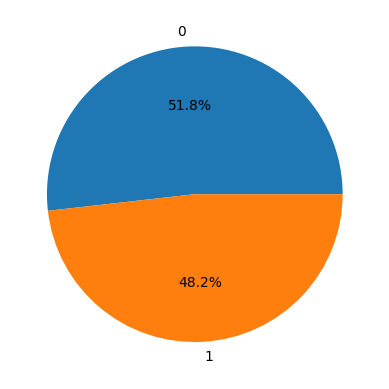

In [ ]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

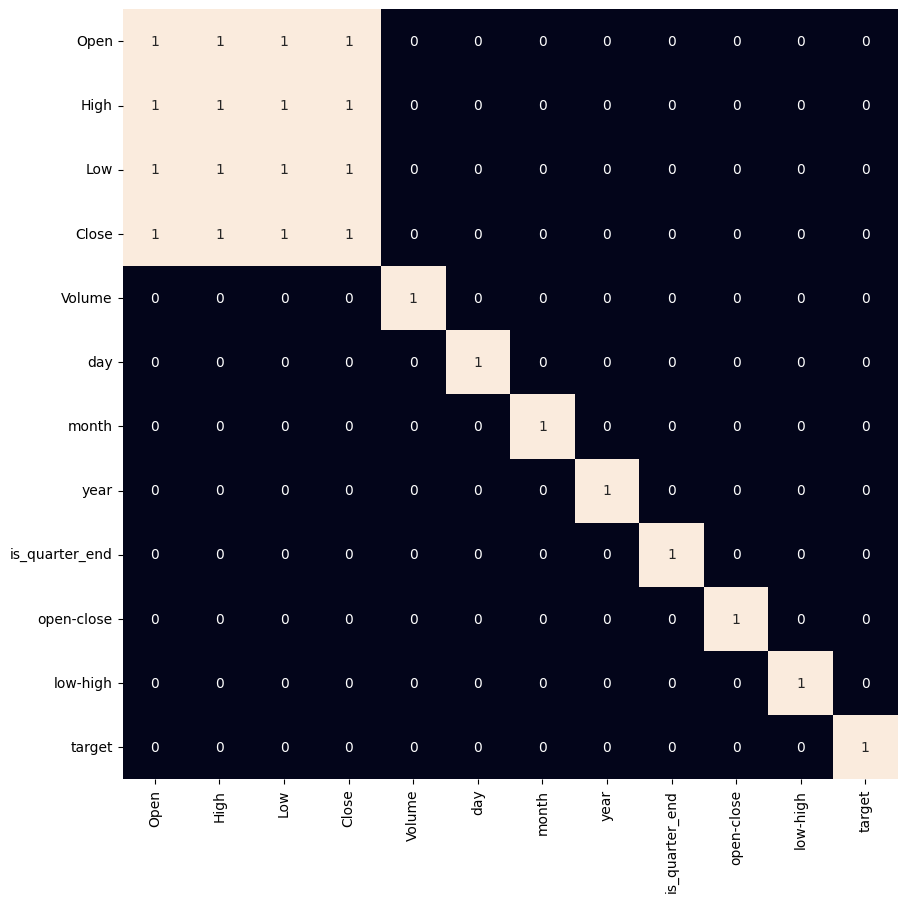

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other